In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
def plot_traj_t(filename="data/amp30.000000_freq1.000000_phi0.500000_dist30.000000_turn15_tial1.txt", params=[30, 1.0, 0.5]):
    file = open(filename, 'r')
    xyt = []
    traj_t = file.readlines()
    regex = r"\d+\.\d+"
    for ele in traj_t:
        x, y, t = re.findall(regex, ele)
        xyt.append([float(x), float(y), float(t)])
    xyt = np.array(xyt)
    dist = np.power((xyt - xyt[0, :]), 2)[:, :-1].sum(axis=1)
    speed = dist / xyt[:, -1] * 1000
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    ax1.plot(xyt[:, 0], xyt[:, 1])

    ax1.scatter(xyt[0, 0], xyt[0, 1], color='green', label='Start')
    ax1.scatter(xyt[-1, 0], xyt[-1, 1], color='red', label='End')
    ax1.set_xlim([0, 5])
    ax1.set_ylim([0, 3])
    ax1.legend()
    ax1.set_title('Trajectory (m)')

    ax2.set_title('Average Speed (m/s)')
    ax2.plot(xyt[:, 2]/1000, speed)
    ax2.set_xlabel('Time (s)')
    plt.suptitle('$A$: {:d} $f$: {:.2f} $\phi$: {}'.format(params[0], params[1], params[2]))
    plt.savefig('A_{:d}_f_{:.2f}_phi_{}.pdf'.format(params[0], params[1], params[2]))

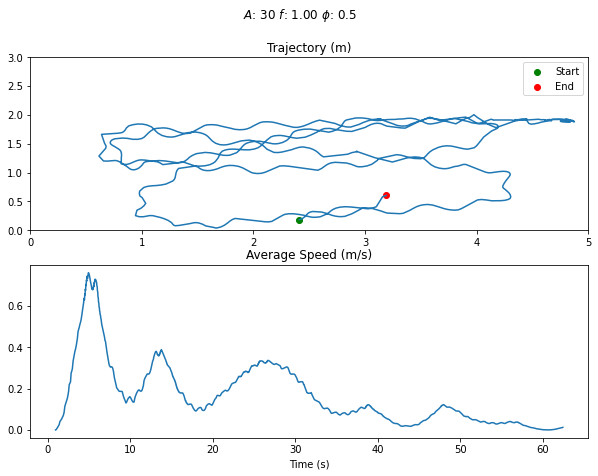

In [3]:
plot_traj_t()

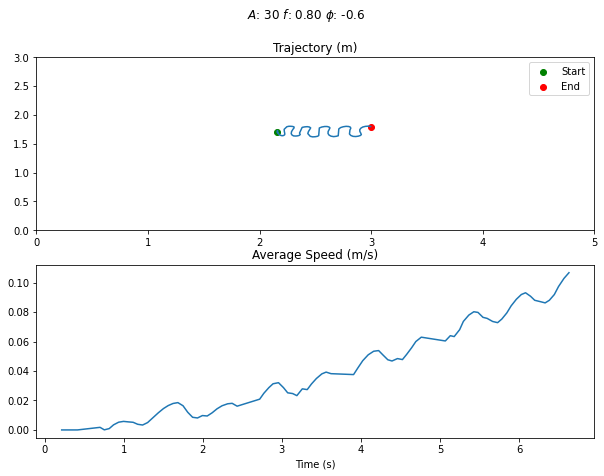

In [4]:
# Make sure the first parameter is the filename, the second is in the order of [Amplitude, frequency, phase_lag]
plot_traj_t("data/amp30.000000_freq0.800000_phi-0.600000_dist5.000000_tial1.txt", [30, 0.8, -0.6])

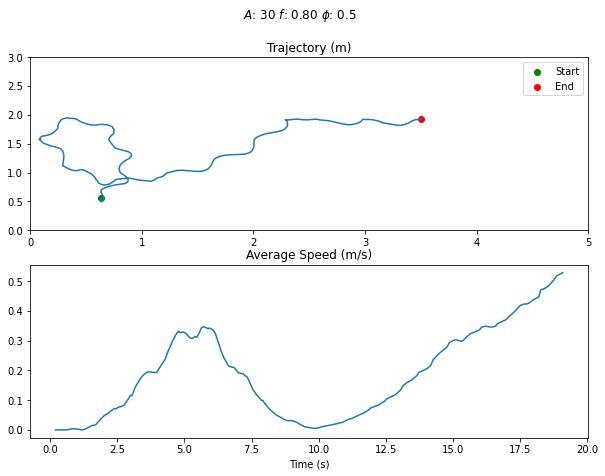

In [5]:
# Make sure the first parameter is the filename, the second is in the order of [Amplitude, frequency, phase_lag]
plot_traj_t("data/amp30.000000_freq0.800000_phi0.500000_dist20.000000_turn15_tial6.txt", [30, 0.8, 0.5])